In [76]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from statsmodels.nonparametric.smoothers_lowess import lowess
from tqdm import tqdm

In [77]:
def simple_pvalue_rule(Xs, mus):
    selected = Xs > 2
    val = mus[selected].sum()
    return val, selected

def eb_selection_rule(Xs, mus):
    mu = np.mean(Xs)
    var = np.mean((Xs - mu)**2)
    selected = (Xs > -mu/(var - 1))

    val = mus[selected].sum()
    return val, selected

def URE_selection_rule(Xs, mus):

    C_grid = np.linspace(min(Xs),max(Xs),1000)

    F_1 = np.zeros(len(C_grid)).astype(float)
    F_2 = np.zeros(len(C_grid)).astype(float)

    for i in range(len(C_grid)):
        F_1[i] = Xs[Xs >= C_grid[i]].sum()
        
    width = 0.2
    ecdf = scipy.stats.ecdf(Xs)
    F_2 = len(Xs)*(ecdf.cdf.evaluate(C_grid + width) - ecdf.cdf.evaluate(C_grid - width))/(2*width)
    URE = lowess(F_1 - F_2, C_grid, frac=0.2, return_sorted = False)
    C = C_grid[np.argmax(URE)]

    selected = (Xs > C)
    val = mus[selected].sum()
    return val, selected


In [78]:

Xs = np.random.normal(mus,1)

mu = np.mean(Xs)
var = np.mean((Xs - mu)**2)
selected = (Xs > -mu/(var - 1))

val = mus[selected].sum()

In [79]:
mus[(Xs > -m/(s**2))].sum()

-63.862298305251386

In [ ]:
mc_samples = 500
n = 10000
mus = np.random.uniform(-3,-2,n)

m = -1
s = 1
#mus = np.random.normal(m,s,n)
#mus = np.random.standard_cauchy(n)

optimal_value = mus[mus > 0].sum()

pval_values = np.zeros(mc_samples).astype(float)
eb_values = np.zeros(mc_samples).astype(float)
bayes_values = np.zeros(mc_samples).astype(float)
ure_values = np.zeros(mc_samples).astype(float)

for i in tqdm(range(mc_samples)):
    Xs = np.random.normal(mus,1)
    
    v1, _ = simple_pvalue_rule(Xs, mus)
    pval_values[i] = v1 

    v2, _ = eb_selection_rule(Xs, mus)
    eb_values[i] = v2 

    v3,_ = URE_selection_rule(Xs, mus)
    ure_values[i] = v3 
    #bayes_values[i] = mus[(Xs > -m/(s**2))].sum()

print("Optimal:", optimal_value/n)
print("PVal Value:", pval_values.mean()/n)
print("EB Value:", eb_values.mean()/n)
print("URE Value:", ure_values.mean()/n)
#print("Oracle Bayes Value:", bayes_values.mean()/n) # only relevant with normal prior


100%|██████████| 500/500 [00:21<00:00, 23.12it/s]

Optimal: 0.0
PVal Value: -1.327934464058603e-05
EB Value: 0.0
URE Value: -2.8673616548258346e-06


In [74]:
mc_samples = 500
n = 10000
#mus = np.random.uniform(-,5,n)
mus = np.random.normal(-0.05,0.05,n)
Xs = np.random.normal(mus,1)

## PValue
selected = Xs > 2
val = mus[selected].sum()

## EB
mu = np.mean(Xs)
var = np.mean((Xs - mu)**2)
selected = (Xs > -mu/(var - 1))
val = mus[selected].sum()


## URE
C_grid = np.linspace(min(Xs),max(Xs),1000)

F_1 = np.zeros(len(C_grid)).astype(float)
F_2 = np.zeros(len(C_grid)).astype(float)

for i in range(len(C_grid)):
    F_1[i] = Xs[Xs >= C_grid[i]].sum()
    
width = 0.2
ecdf = scipy.stats.ecdf(Xs)
F_2 = n*(ecdf.cdf.evaluate(C_grid + width) - ecdf.cdf.evaluate(C_grid - width))/(2*width)
URE = lowess(F_1 - F_2, C_grid, frac=0.2, return_sorted = False)
C = C_grid[np.argmax(URE)]

selected = (Xs > C)
val = mus[selected].sum()

true_risk = np.zeros_like(C_grid)
for i in range(len(C_grid)):
    true_risk[i] = np.sum(mus*scipy.stats.norm.cdf(mus - C_grid[i]))


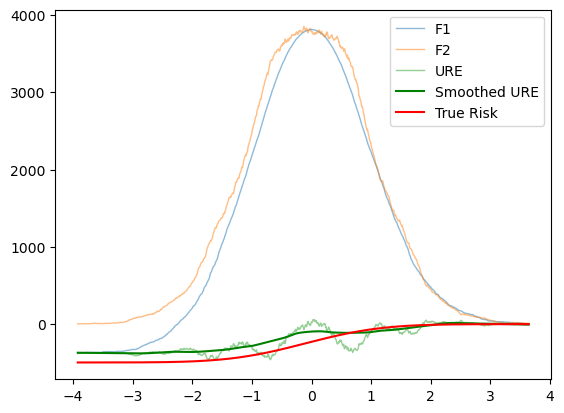

In [75]:


plt.plot(C_grid, F_1, linewidth = 1, label = "F1", alpha = 0.5)
plt.plot(C_grid, F_2, linewidth = 1, label = "F2", alpha = 0.5)
plt.plot(C_grid, F_1 - F_2, linewidth = 1, label = "URE", alpha = 0.5)
plt.plot(C_grid, URE, color = "green", label = "Smoothed URE")
plt.plot(C_grid, true_risk, color = "red", label = "True Risk")
plt.legend()
plt.show()